# Linear Regression Model using sklearn for housing data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#dir(datasets) to know all datasets in sklearn

In [3]:
#loading dataset
#data handling
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Real estate.csv")

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.drop(['No'],axis=1,inplace=True)

In [6]:
df.shape

(414, 7)

In [7]:
x=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [8]:
print(x.shape)
print(y.shape)

(414, 6)
(414,)


In [9]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [10]:
#correct algo
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
#pd.DataFrame(model.coef_,x.columns,columns=['coefficients'])

In [12]:
y_pred=model.predict(x_test)

In [13]:
#Now we have our actual and predicted values of y
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
176,19.2,12.638304
347,11.2,10.030446
307,24.7,22.988074
299,46.1,48.502648
391,31.3,32.671405
...,...,...
16,70.1,51.625078
31,25.0,41.314541
36,22.9,30.378573
41,18.2,16.007539


In [14]:
#computing the performance
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print(MSE)
print(RMSE)

46.21179783493126
6.797925995105512


In [15]:
df['Y house price of unit area'].mean()

37.98019323671498

In [16]:
#calculating error for each col
error=y_test-y_pred
error

176     6.561696
347     1.169554
307     1.711926
299    -2.402648
391    -1.371405
         ...    
16     18.474922
31    -16.314541
36     -7.478573
41      2.192461
24      3.495265
Name: Y house price of unit area, Length: 125, dtype: float64

Text(0.5, 1.0, 'selling price prediction')

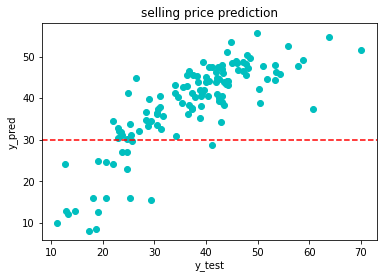

In [17]:
plt.scatter(x=y_test,y=y_pred,color='c')
plt.axhline(y=30,color='r',ls='--')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("selling price prediction")

<AxesSubplot:xlabel='Y house price of unit area'>

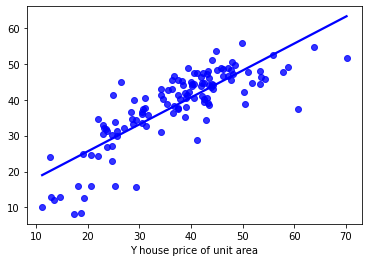

In [18]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None, data=df,color='b')

In [ ]:
#training curve lower that validatn curve
#accuracy
